# Exercitiul 1

In [3]:
import random

# deschide fisierul pentru citire
nume_studenti = [] # lista care retine toate numele din fisier
with open('file.csv', 'r') as file:
    for linie in file:  # se citeste linie cu linie
        nume = linie.strip()  # se elimina spatiile de la inceput si de la sfarsit
        nume_studenti.append(nume)

esantion_aleatoriu = random.sample(nume_studenti, 5)
print(esantion_aleatoriu)

['Ana Marinescu', 'Diana Dobre', 'Victor Sandu', 'Ioan Georgescu', 'Maria Ionescu']


# Exercitiul 2

a) Numarul de pasi N reprezinta numarul de aruncari pana cand apare prima stema.
Aceasta urmează o distributie geometrica, intrucat modeleaza numarul de incercari pana la primul succes (obtinerea stemei la aruncarea unei monede).

b) Simularea jocului

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_game(p):
  N = 0
  S = 0

  while True:
    N += 1
    fata = np.random.choice(["stema", "ban"], p = [p, 1 - p])
    if fata == "stema":
      zar = np.random.randint(1, 7)
      if zar - 3 < 0:
        return N, 0 # S este 0, deoarece in cazul in care (zar - 3) este negativ, primeste bani de la primul player, deci nu da nimic
      else:
        return N, (zar - 3) 

n, s = generate_game(1/2)
print(f"Numarul de pasi ai jocului este: {n}, iar suma totala S este: {s}")

Numarul de pasi ai jocului este: 1, iar suma totala S este: 1


C) Simularea unui numar mare de jocuri si determinarea cu aproximatie a mediei lui S si reprezentarii grafice a distributiei

Media lui S este: 0.9917


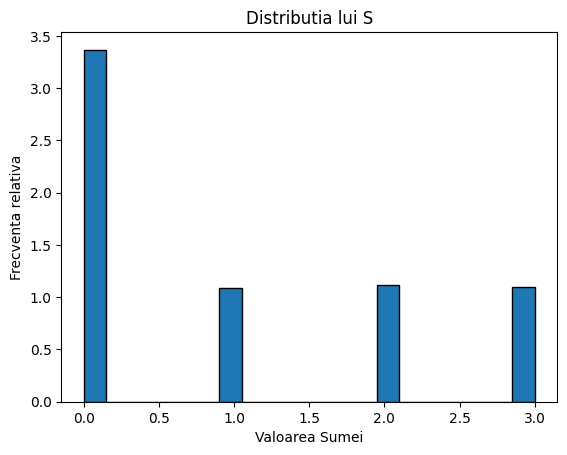

In [10]:
sum_list = []
for i in range(10000):
  N, S = generate_game(1/2)
  sum_list.append(S)

m = np.mean(sum_list)
print(f"Media lui S este: {m}")

# reprezentarea grafica a distributiei lui S
plt.hist(sum_list, bins=20, edgecolor='black', density=True)
plt.title("Distributia lui S")
plt.xlabel("Valoarea Sumei")
plt.ylabel("Frecventa relativa")
plt.show()

d) Luam cazul in care p = 0.3, deci exista sanse mai mici sa cada stema, in comparatie cu ban. Acest lucru nu influenteaza distributia lui S, deoarece jucatarul 2 va da bani primului jucator doar atunci cand pica stema (deci cel mult o singura data, deoarece jobul se incheie dupa). Prin urmare, distributia este ca cea de mai sus.

Media lui S este: 1.0086


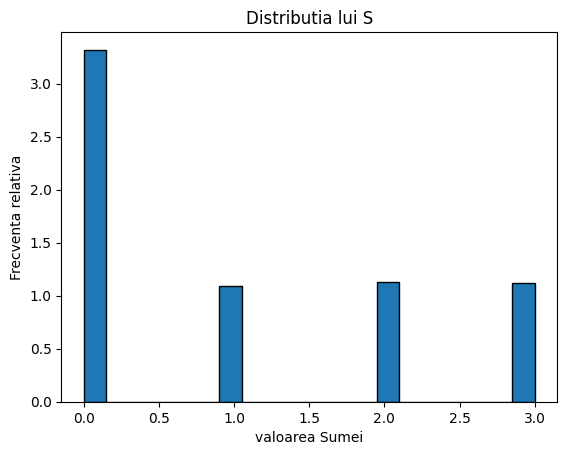

In [11]:
sum_list = []
for i in range(10000):
  N, S = generate_game(0.3)
  sum_list.append(S)

m = np.mean(sum_list)
print(f"Media lui S este: {m}")

# reprezentarea grafica a distributiei lui S
plt.hist(sum_list, bins=20, edgecolor='black', density=True)
plt.title("Distributia lui S")
plt.xlabel("valoarea Sumei")
plt.ylabel("Frecventa relativa")
plt.show()

Luam cazul in care p = 0.7, deci cresc sansele de a pica stema. Din nou, distributia lui S este ramane aceeasi, deoarece al doilea jucator va da bani primului jucator cel mult o singura data, atunci cand pica stema. Prin urmare, distributia este ca cea de mai sus.

Media lui S este: 1.0039


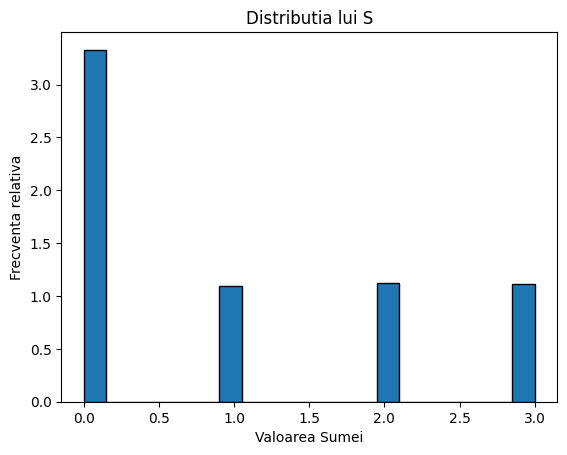

In [12]:
sum_list = []
for i in range(10000):
  N, S = generate_game(0.7)
  sum_list.append(S)

m = np.mean(sum_list)
print(f"Media lui S este: {m}")

# reprezentarea grafica a distributiei lui S
plt.hist(sum_list, bins=20, edgecolor='black', density=True)
plt.title("Distributia lui S")
plt.xlabel("Valoarea Sumei")
plt.ylabel("Frecventa relativa")
plt.show()

# Exercitiul 3

De ce probabilitatile de preluare a unui client de catre un anumit frizer sunt 3/13, 6/13, respectiv 4/13?
Probabilitatea fiecarui frizer reflecta numarul de persoane tunse intr-o ora, raportat la numarul total de persone tunse de catre cei 3 frizeri.
Numarul total de persoane tunse intr-o ora de catre cei 3 frizeri este: 3 + 6 + 4 = 13.
Primul frizer tunde 3 persone / h, deci probabilitatea de a fi preluat de primul frizer este 3/13
Al doilea frizer tunde 6 persone / h, deci probabilitatea de a fi preluat de al doilea frizer este 6/13
Al treilea frizer tunde 4 persone / h, deci probabilitatea de a fi preluat de al treilea frizer este 4/13

Media estimata a lui X este: 0.23299333852973192
Deviatia standard estimată a lui X este: 0.2516408293194119


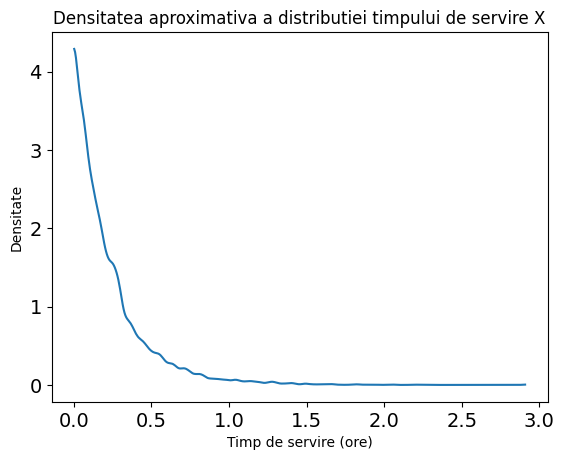

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

X = [] # lista care va retine cele 10000 de valori ale lui X
for i in range(10000): # simulam cele 10000 de valori pentru X
  frizer = np.random.choice([1, 2, 3], p = [3 / 13, 6 / 13, 4 / 13]) # alegem in functie de probabilitatile fiecaruia un frizer

  # in functie de timpul de servire al unui client, este determinat si valoarea lui X
  if frizer == 1:
    X.append(np.random.exponential(scale = 1 / 3))
  elif frizer == 2:
    X.append(np.random.exponential(scale= 1 / 6))
  else:
    X.append(np.random.exponential(scale = 1 / 4))

# calculam media si deviatia standard pentru valorile lui X
m = np.mean(X)
dev_std = np.std(X)

print(f"Media estimata a lui X este: {m}")
print(f"Deviatia standard estimată a lui X este: {dev_std}")

# grafic aproximativ al densitatii distributiei lui X
X = np.array(X) # transformam lista intr-un array Numpy
az.plot_kde(X)
plt.title('Densitatea aproximativa a distributiei timpului de servire X')
plt.xlabel('Timp de servire (ore)')
plt.ylabel('Densitate')
plt.show()